# Overview

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tec_chall.csv')

In [3]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,temp_delta
0,28.0,5.0,26,21.5,12,NaN,1,0,0,0,45.0,E10,9.5
1,12.0,4.2,30,21.5,13,NaN,1,0,0,0,NaN,NaN,8.5
2,11.2,5.5,38,21.5,15,NaN,1,0,0,0,NaN,NaN,6.5
3,12.9,3.9,36,21.5,14,NaN,1,0,0,0,NaN,NaN,7.5
4,18.5,4.5,46,21.5,15,NaN,1,0,0,0,NaN,NaN,6.5


In [4]:
data_e10 = data[data.gas_type == 1]
data_e10.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,temp_delta
0,28.0,5.0,26,21.5,12,NaN,1,0,0,0,45.0,E10,9.5
1,12.0,4.2,30,21.5,13,NaN,1,0,0,0,NaN,NaN,8.5
2,11.2,5.5,38,21.5,15,NaN,1,0,0,0,NaN,NaN,6.5
3,12.9,3.9,36,21.5,14,NaN,1,0,0,0,NaN,NaN,7.5
4,18.5,4.5,46,21.5,15,NaN,1,0,0,0,NaN,NaN,6.5


In [5]:
data_sp98 = data[data.gas_type == 0]
data_sp98.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,temp_delta
44,5.4,3.3,32,21.5,7,NaN,0,0,0,0,37.6,SP98,14.5
45,2.0,9.9,21,21.5,4,NaN,0,0,0,0,NaN,NaN,17.5
46,14.2,5.1,32,21.5,7,NaN,0,0,0,0,NaN,NaN,14.5
47,16.0,4.9,25,21.5,8,NaN,0,0,0,0,NaN,NaN,13.5
48,11.8,4.9,25,21.5,11,NaN,0,0,0,0,NaN,NaN,10.5


In [6]:
print("E10:")
print("mean distance:", data_e10.distance.mean())
print("mean consume:", data_e10.consume.mean())
print("mean speed:", data_e10.speed.mean())
print("mean temp_outside:", data_e10.temp_outside.mean())
print("mean temp_delta:", data_e10.temp_delta.mean())

E10:
mean distance: 21.096250000000005
mean consume: 4.931250000000001
mean speed: 43.50625
mean temp_outside: 10.11875
mean temp_delta: 12.114649681528663


In [7]:
print("SP98:")
print("mean distance:", data_sp98.distance.mean())
print("mean consume:", data_sp98.consume.mean())
print("mean speed:", data_sp98.speed.mean())
print("mean temp_outside:", data_sp98.temp_outside.mean())
print("mean temp_delta:", data_sp98.temp_delta.mean())

SP98:
mean distance: 18.639912280701765
mean consume: 4.899122807017543
mean speed: 40.82017543859649
mean temp_outside: 12.228070175438596
mean temp_delta: 10.449771689497718


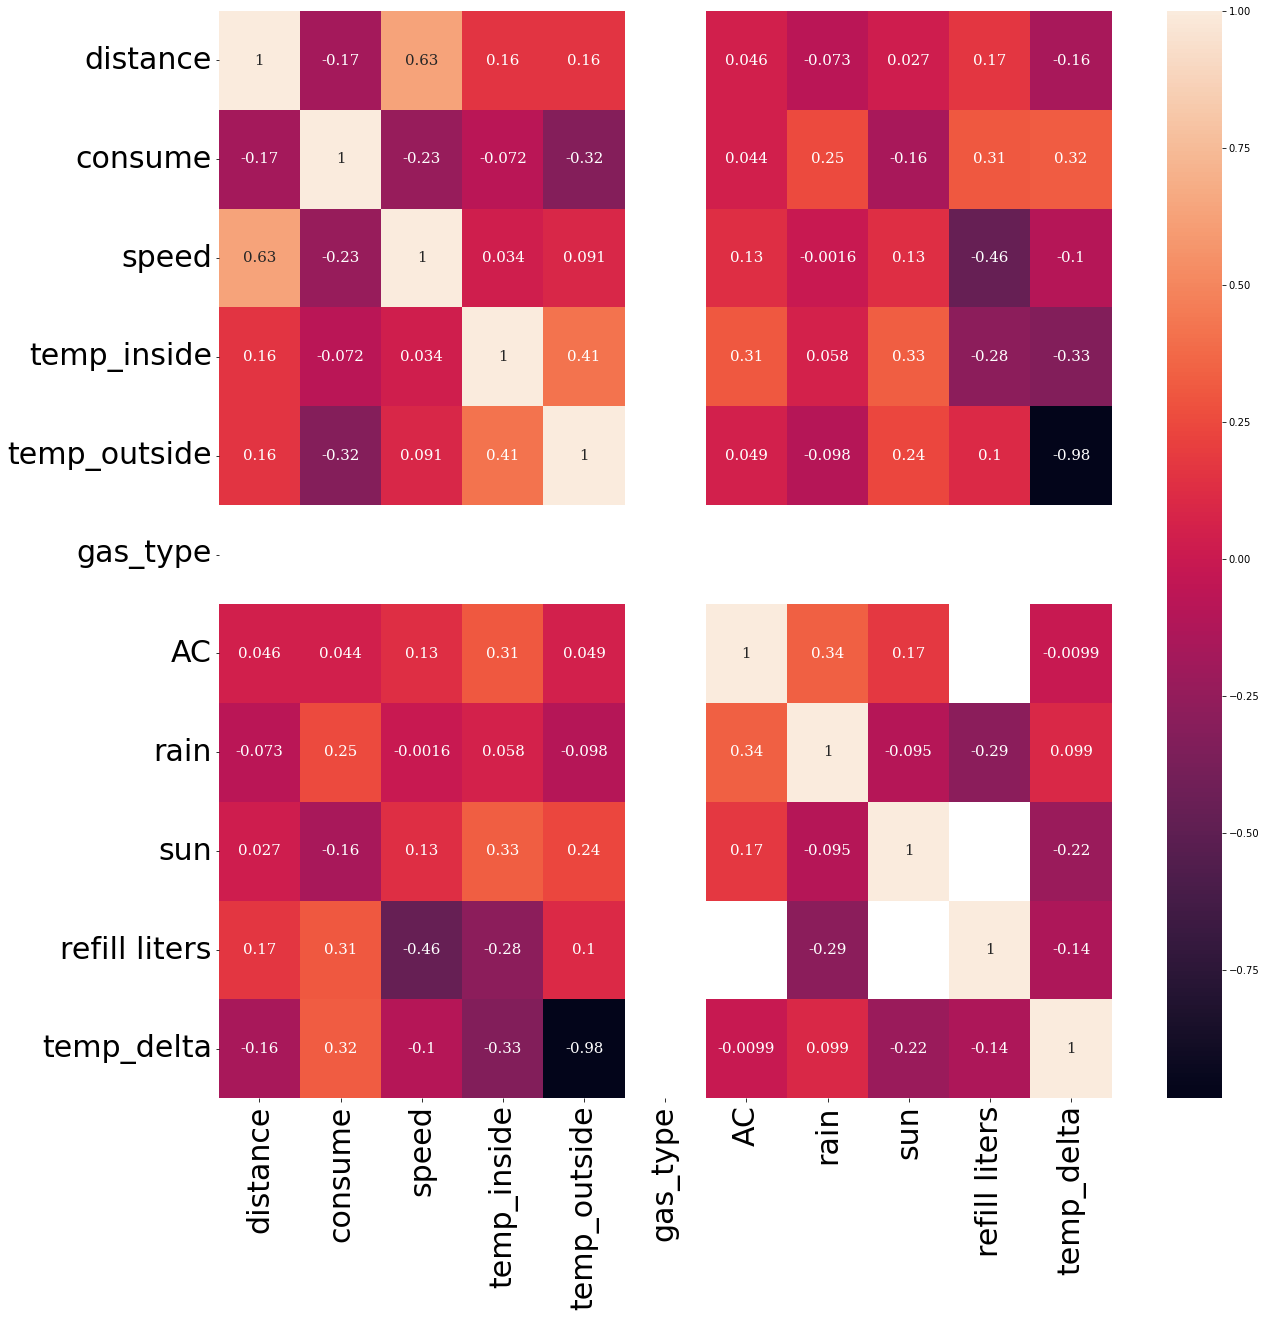

In [8]:
correlations_matrix = data_e10.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True, fmt='.2g', annot_kws={
                'fontsize': 15,
                'fontfamily': 'serif'
            })
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=0, fontsize=30)
plt.show()

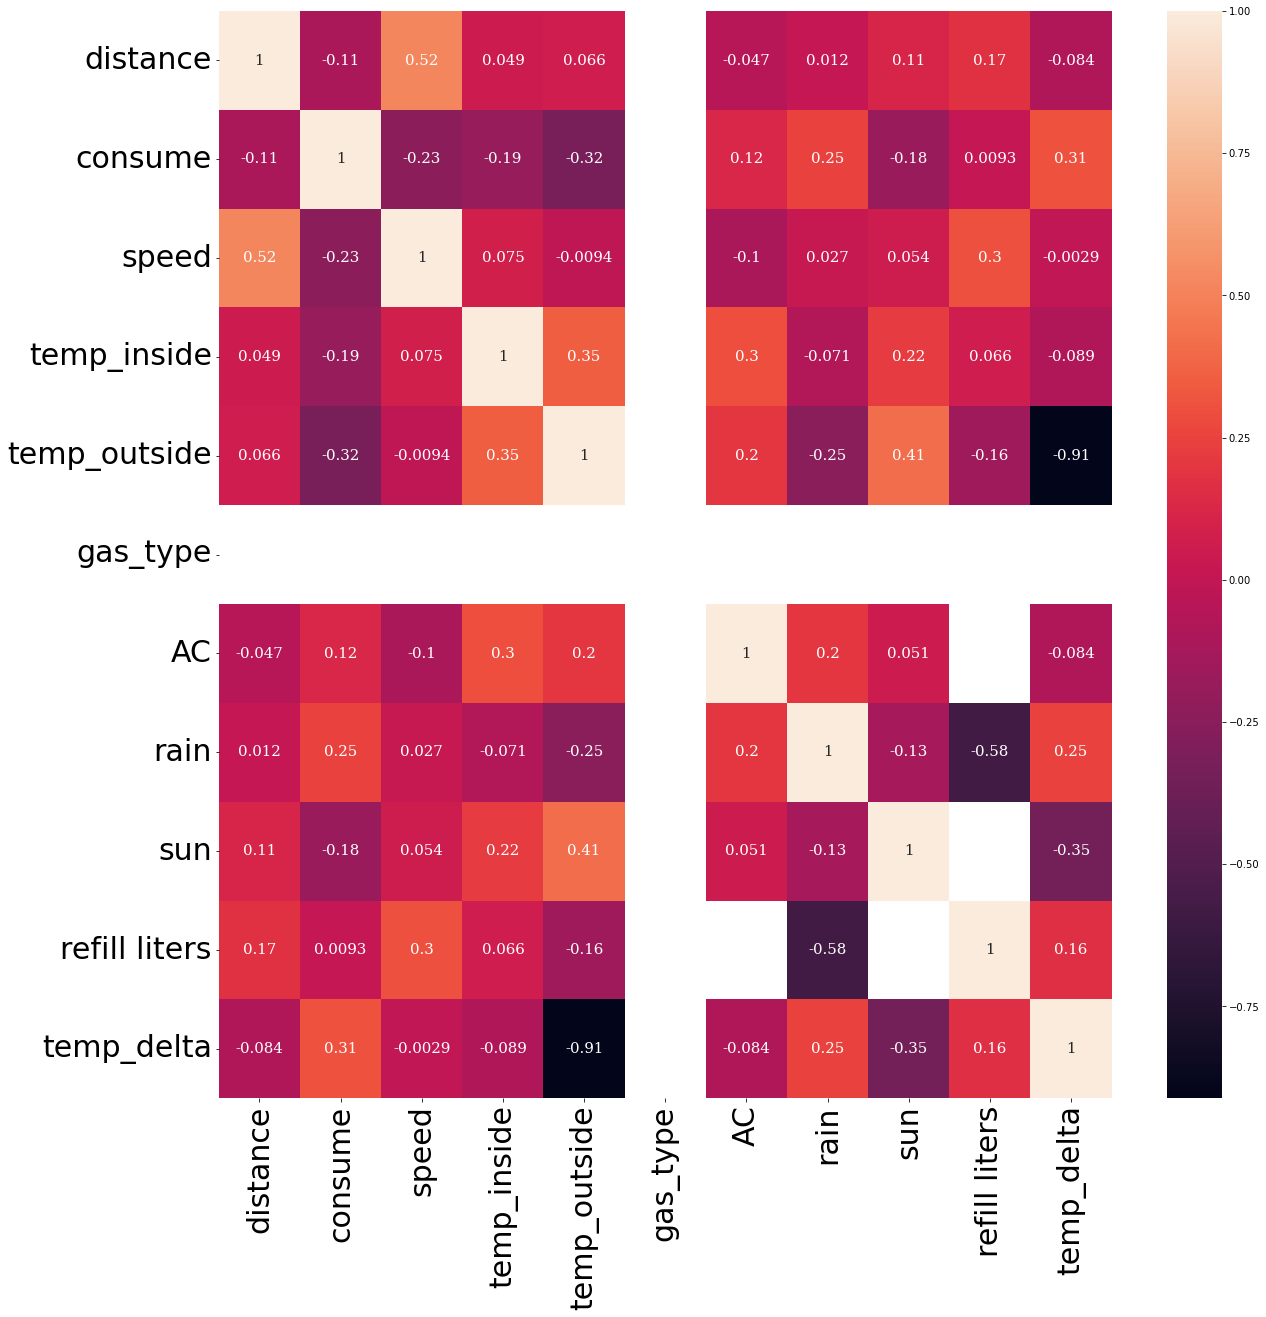

In [9]:
correlations_matrix = data_sp98.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True, fmt='.2g', annot_kws={
                'fontsize': 15,
                'fontfamily': 'serif'
            })
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=0, fontsize=30)
plt.show()

In [10]:
data.temp_outside.median()

10.0

In [11]:
data_e10_plus10 = data_e10[data_e10.temp_outside >= 10]
data_e10_plus10.shape

(79, 13)

In [12]:
data_e10_minus10 = data_e10[data_e10.temp_outside < 10]
data_e10_minus10.shape

(81, 13)

In [13]:
data_sp98_plus10 = data_sp98[data_sp98.temp_outside >= 10]
data_sp98_plus10.shape

(135, 13)

In [14]:
data_sp98_minus10 = data_sp98[data_sp98.temp_outside < 10]
data_sp98_minus10.shape

(93, 13)

In [15]:
print("mean consume for gas type E10 over 10 °C:", data_e10_plus10.consume.mean())
print("mean consume for gas type E10 under 10 °C:", data_e10_minus10.consume.mean())
print("mean consume for gas type sp98 over 10 °C:", data_sp98_plus10.consume.mean())
print("mean consume for gas type sp98 under 10 °C:", data_sp98_minus10.consume.mean())

mean consume for gas type E10 over 10 °C: 4.739240506329115
mean consume for gas type E10 under 10 °C: 5.11851851851852
mean consume for gas type sp98 over 10 °C: 4.641481481481483
mean consume for gas type sp98 under 10 °C: 5.273118279569894


In [16]:
# based on temperature outside the consume of gas/fuel is higher with e10 when it is cold outside

In [17]:
data_sun = data[data.sun == 1]
data_no_sun = data[data.sun == 0]
data_rain = data[data.rain == 1]
data_no_rain = data[data.rain == 0]

In [18]:
print("mean consume for sun=1:", data_sun.consume.mean())
print("mean consume for sun=0:", data_no_sun.consume.mean())
print("mean consume for rain=1:", data_rain.consume.mean())
print("mean consume for rain=0:", data_no_rain.consume.mean())

mean consume for sun=1: 4.324999999999998
mean consume for sun=0: 4.965168539325838
mean consume for rain=1: 5.59375
mean consume for rain=0: 4.816176470588233


In [19]:
# mean consum is higher when rain or no sun

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


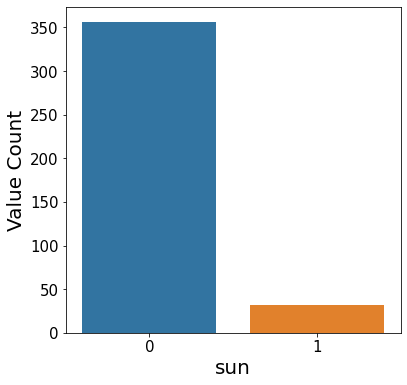

In [20]:
plt.figure(figsize=(6,6))
sns.countplot('sun', data=data)
plt.ylabel('Value Count', fontsize=20)
plt.xlabel('sun', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


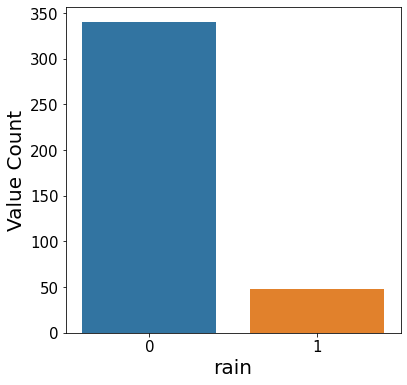

In [21]:
plt.figure(figsize=(6,6))
sns.countplot('rain', data=data)
plt.ylabel('Value Count', fontsize=20)
plt.xlabel('rain', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
data["specials"].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [23]:
data['specials'] = data['specials'].fillna('Unknown')
data.loc[data['specials'].str.contains('AC'), 'specials'] = 'AC'
data.loc[data['specials'].str.contains('ac'), 'specials'] = 'AC'

In [24]:
data["specials"].value_counts()

Unknown               295
rain                   32
AC                     30
sun                    27
snow                    3
half rain half sun      1
Name: specials, dtype: int64

In [25]:
data_ac = data[data.specials == 'AC']
data_no_ac = data[data.specials != 'AC']

In [26]:
print("mean consume for ac on:", data_ac.consume.mean())
print("mean consume for ac off:", data_no_ac.consume.mean())

mean consume for ac on: 5.003333333333333
mean consume for ac off: 4.904748603351952


In [27]:
# consume is higher when ac is on

In [28]:
data.temp_delta.median()

11.5

In [29]:
data_temp_delta_low = data[data.temp_delta < 11.5]
data_temp_delta_high = data[data.temp_delta >= 11.5]

In [30]:
print("mean consume for low temp_delta:", data_temp_delta_low.consume.mean())
print("mean consume for high temp_delta:", data_temp_delta_high.consume.mean())

mean consume for low temp_delta: 4.633149171270721
mean consume for high temp_delta: 5.196410256410256


In [31]:
# consume is high when temperature difference is high between in- and outside.

In [32]:
data.distance.median()

14.6

In [34]:
data_dist_low = data[data.distance < 15]
data_dist_high = data[data.distance >= 15]

In [35]:
print("mean speed for low distance:", data_dist_low.speed.mean())
print("mean speed for high distance:", data_dist_high.speed.mean())

mean speed for low distance: 37.76923076923077
mean speed for high distance: 46.129533678756474


In [33]:
# result:
# Unfortunately, I don't have a driver's license and can only guess at some terms...

# the consume between e10 and sp98 is roughly the same. e10 is better when it is cold
# the overall consume is better when it is warm, sunny and with no rain
# the consume can be predicted using 'rain', 'temp_outside', 'sun' and 'speed' column
# the average speed is higher when driving a longer distance
# the prediction is on average 0,58 liter/100km away from the real consume
# without knowing how e10 and sp98 differ in price and ecologically, it is difficult to say which fuel is recommended
# consume is lower when the sun is shining, the ac is of and there is no rain